<img src="http://vision.skills.network/logo-light.png" width="400" alt="CV Studio logo"  />


## Objectives


* * *


## Load Important Libraries


Libraries for data processing and visualization:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Libraries for image pre-processing and classification:


In [2]:
import cv2

Libraries for Computer Vision Studio:


In [3]:
from skillsnetwork import cvstudio

## Setup CV Studio Client, Get the Model and Annotations


In [4]:
# Initialize the CV Studio Client
cvstudioClient = cvstudio.CVStudio()

Get the annotations from the CV Studio project:


In [5]:
annotations = cvstudioClient.get_annotations()

Download the model (for k-NN this means samples and format):


In [6]:
model_details = cvstudioClient.downloadModel()

Get k_best from model details (we reported this previously when training):


In [7]:
k_best = model_details["k_best"]

Load and re-train model:


In [8]:
## get the model from the cv studio storage
fs = cv2.FileStorage(model_details['filename'], cv2.FILE_STORAGE_READ)
knn_yml = fs.getNode('opencv_ml_knn')

knn_format = knn_yml.getNode('format').real()
is_classifier = knn_yml.getNode('is_classifier').real()
## number of samples
default_k = knn_yml.getNode('default_k').real()
## sample arrays
samples = knn_yml.getNode('samples').mat()
## labels of sample
responses = knn_yml.getNode('responses').mat()
fs.release
knn = cv2.ml.KNearest_create()
knn.train(samples,cv2.ml.ROW_SAMPLE,responses)

True

## Test Our Model with an Uploaded Image


Replace <code>your_uploaded_file</code> below with the name of your image as seen in your directory:


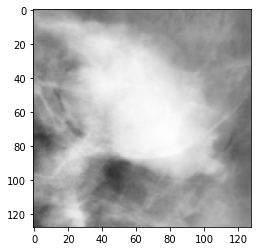

In [16]:
my_image = cv2.imread("9327.png")
## let's see what the image looks like
image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Convert image to grayscale - grayscale simplifies the algorithm and reduces computational requirements.


In [17]:
#make images gray
my_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)

Resize the image to reduce the size:


In [18]:
my_image = cv2.resize(my_image, (32, 32))

Flatten the image into a numpy array:


In [19]:
pixel_image = my_image.flatten()
pixel_image = np.array([pixel_image]).astype('float32')

Classify the image and print out the result of the model:


In [20]:
ret,result,neighbours,dist = knn.findNearest(pixel_image,k=4)
print(neighbours)
print('Your image was classified as a ' + str(annotations['labels'][int(ret)]))

[[1. 1. 1. 1.]]
Your image was classified as a ben


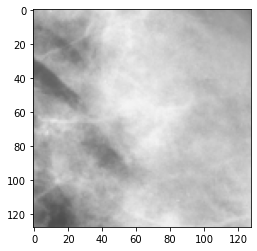

In [30]:
my_image = cv2.imread("6.png") #------------------norm image 
## let's see what the image looks like
image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [31]:
#make images gray 
my_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)
my_image = cv2.resize(my_image, (32, 32))

In [32]:
pixel_image = my_image.flatten()
pixel_image = np.array([pixel_image]).astype('float32')

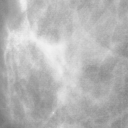When we print out the neigbours, it tells you the <code>k</code> closest classes and uses a majority voting process to pick what your image may be classified as.


In [33]:
ret,result,neighbours,dist = knn.findNearest(pixel_image,k=4)
print(neighbours)
print('Your image was classified as a ' + str(annotations['labels'][int(ret)]))

[[0. 1. 0. 1.]]
Your image was classified as a nor
